In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [34]:
df = pd.read_csv('groupon.txt', sep=None, engine='python')

In [35]:
df.head(10)

,refund_bucket,refund_sub_bucket,order_date,transaction_date,week_end_date,dmm_subcat_1,category_1,deal_supply_channel,buyer_name_1,auth_bookings,capture_bookings,refunds,cancel_refunds,refunded_units,auth_refunds,capture_units
0,Other,Other,8/4/2016,8/4/2016,8/7/2016,Inverse Normal,Probability distribution II,Goods Stores,Asher,?,?,91.87,?,3,?,?
1,Returns,Change of mind,8/31/2018,9/21/2018,9/23/2018,Binomial Distribution.,Probability distribution I,Goods,Jesus,?,?,20.98,?,1,?,?
2,Fraud,Fraud,4/19/2017,4/19/2017,4/23/2017,Power series,Calculus II,Goods,Tristan,?,?,?,79.94,?,?,?
3,Two-Hour Refunds,Two-Hour Refunds,2/5/2016,2/5/2016,2/7/2016,Prime Factorization Algorithms,?,Goods,Jeremiah,?,?,49.267469958,?,1,?,?
4,Shortage Cancellations,Vendor Shortage,7/21/2018,8/15/2018,8/19/2018,Transformations,Geometry,Goods,Jacob,?,?,29.97,?,2,?,?
5,Logistics Cancellations,Dead Tracking,11/17/2016,12/8/2016,12/11/2016,Surface of revolution,Calculus II,Goods,River,?,?,34.99,?,1,?,?
6,?,?,7/17/2018,7/19/2018,7/22/2018,Folded Normal / Half Normal Distribution.,Probability distribution I,Goods,Tessa,?,1597.29449477419,?,?,?,?,95
7,Other,Other,4/10/2017,7/14/2017,7/16/2017,Non Linear programming,Operations Research,Goods,Kaylee,?,?,4.99,?,1,?,?
8,Returns,Change of mind,11/9/2018,12/21/2018,12/23/2018,Power series,Calculus II,Goods,?,?,?,19.99,?,1,?,?
9,Fraud,Fraud,9/14/2018,9/14/2018,9/16/2018,Power series,Calculus II,Goods,?,?,?,?,5082.78,?,?,?


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6831276 entries, 0 to 6831275
Data columns (total 16 columns):
refund_bucket          object
refund_sub_bucket      object
order_date             object
transaction_date       object
week_end_date          object
dmm_subcat_1           object
category_1             object
deal_supply_channel    object
buyer_name_1           object
auth_bookings          object
capture_bookings       object
refunds                object
cancel_refunds         object
refunded_units         object
auth_refunds           object
capture_units          object
dtypes: object(16)
memory usage: 833.9+ MB


### Data Cleaning and Transformation

In [37]:
df['refunded_units'] = df['refunded_units'].str.replace('?', '0')

In [38]:
df['refunded_units'] = df['refunded_units'].astype(int)

Now when we convereted refunded units into integer data type, let's work with auth_refunds, and capture_units in the same way.

In [39]:
df['auth_refunds'] = df['auth_refunds'].str.replace('?', '0')
df['auth_refunds'] = df['auth_refunds'].astype(int)

In [40]:
df['capture_units'] = df['capture_units'].str.replace('?', '0')
df['capture_units'] = df['capture_units'].astype(int)

Now let's convert auth_bookings, capture_bookings, refunds, and cancel_refunds columns into the float data type.

In [41]:
df['auth_bookings'] = df['auth_bookings'].str.replace('?', '0')
df['auth_bookings'] = df['auth_bookings'].astype(float)

In [42]:
df['capture_bookings'] = df['capture_bookings'].str.replace('?', '0')
df['capture_bookings'] = df['capture_bookings'].astype(float)

In [43]:
df['refunds'] = df['refunds'].str.replace('?', '0')
df['refunds'] = df['refunds'].astype(float)

In [44]:
df['cancel_refunds'] = df['cancel_refunds'].str.replace('?', '0')
df['cancel_refunds'] = df['cancel_refunds'].astype(float)

Now when we converted our refunds columns to float data type, let's convert transaction_date and week_end_date into date/time data type.

In [45]:
df['order_date'] = pd.to_datetime(df['order_date'], infer_datetime_format=True)
df['transaction_date'] = pd.to_datetime(df['transaction_date'], infer_datetime_format=True)
df['week_end_date'] = pd.to_datetime(df['week_end_date'], infer_datetime_format=True)

### DMM_SUBCAT_1 COLUMN

In [46]:
df['dmm_subcat_1'] = df['dmm_subcat_1'].str.replace('?', 'unknown')

In [47]:
print(df['dmm_subcat_1'].nunique())
print(df['dmm_subcat_1'].value_counts().head(10))

140
Power series                      380191
Surface of revolution             202547
Maclaurin series                  180019
Polynomial functions              173272
Bernoulli Distribution            154714
Prime Factorization Algorithms    147979
Erlang Distribution.              145873
Electrical networks               128065
Degenerate Distribution.          124399
Exponential Distribution.         123513
Name: dmm_subcat_1, dtype: int64


### CATEGORY COLUMN

In [48]:
df['category_1'] = df['category_1'].str.replace('?', 'unknown')
print(df['category_1'].nunique())
print(df['category_1'].value_counts())

14
Probability distribution I     1603719
Probability distribution II    1213601
Calculus II                    1070787
Geometry                        626388
Algebra                         567067
Graph Theory                    520646
Linear Regression               378167
unknown                         376896
Calculus I                      171269
Combinatorics                   117097
Decision Tree                    98516
Operations Research              69411
Clustering algorithms            13813
Ensemble methods                  3899
Name: category_1, dtype: int64


### DEAL SUPPLY CHANNEL COLUMN

In [49]:
df['deal_supply_channel'].value_counts()

Goods           6253600
Goods Stores     577676
Name: deal_supply_channel, dtype: int64

### BUYER NAME COLUMN

In [50]:
df['buyer_name_1'] = df['buyer_name_1'].str.replace('?', 'Unknown')

In [51]:
print(df['buyer_name_1'].nunique())
print(df['buyer_name_1'].value_counts().head(10))

353
Unknown      965347
Asher        520015
Luis         100820
Max           95006
Ezra          88199
Sofia         84766
Giovanni      80643
Stella        79479
Camila        76727
Emmett        75189
Name: buyer_name_1, dtype: int64


### REFUND BUCKET COLUMN

In [52]:
df['refund_bucket'] = df['refund_bucket'].str.replace('?', 'Unknown')

In [53]:
df['refund_bucket'].value_counts()

Returns                    2781522
Unknown                    1956060
Logistics Cancellations    1086118
Two-Hour Refunds            503519
Other                       207162
Shortage Cancellations      170881
Fraud                       126014
Name: refund_bucket, dtype: int64

### REFUND SUB BUCKET COLUMN

In [54]:
df['refund_sub_bucket'] = df['refund_sub_bucket'].str.replace('?', 'Unknown')

In [55]:
df['refund_sub_bucket'].value_counts()

Unknown                     1956060
Product Quality              910743
Change of mind               837070
Two-Hour Refunds             503519
Wrong/Damaged Product        494392
Wrong Size                   472068
Returned to Sender           335514
Dead Tracking                291467
Tracking Shows Delivered     276718
Other                        207162
Purchase Issues              129031
Fraud                        126014
Vendor Shortage              107126
Other Returns                 67249
Shipping Issues               53388
Groupon Error                 29543
Other Shortage                26638
Warehouse Shortage             7574
Name: refund_sub_bucket, dtype: int64

In [56]:
df['refund_sub_bucket'].nunique()

18

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6831276 entries, 0 to 6831275
Data columns (total 16 columns):
refund_bucket          object
refund_sub_bucket      object
order_date             datetime64[ns]
transaction_date       datetime64[ns]
week_end_date          datetime64[ns]
dmm_subcat_1           object
category_1             object
deal_supply_channel    object
buyer_name_1           object
auth_bookings          float64
capture_bookings       float64
refunds                float64
cancel_refunds         float64
refunded_units         int32
auth_refunds           int32
capture_units          int32
dtypes: datetime64[ns](3), float64(4), int32(3), object(6)
memory usage: 755.7+ MB


Now when transaction date column is actually DateTime objects let's use .apply() to create 3 new columns called Year, Month, and Day of Week.

In [58]:
df['transaction_year'] = pd.DatetimeIndex(df['transaction_date']).year
df['transaction_month'] = pd.DatetimeIndex(df['transaction_date']).month
df['transaction_day'] = pd.DatetimeIndex(df['transaction_date']).dayofweek

In [59]:
ts_data = df[["transaction_date", "refunds"]]

In [61]:
ts_data.set_index('transaction_date', inplace=True)

In [67]:
ts_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6831276 entries, 2016-08-04 to 2018-11-12
Data columns (total 1 columns):
refunds    float64
dtypes: float64(1)
memory usage: 104.2 MB


In [68]:
ts_data.sort_values("transaction_date")

,refunds
transaction_date,
2016-01-01,70.000000
2016-01-01,22.534828
2016-01-01,28.980000
2016-01-01,3161.850000
2016-01-01,34.980000
2016-01-01,34.970000
2016-01-01,12.960000
2016-01-01,226.820000
2016-01-01,134.960000


In [71]:
ts_data = pd.to_datetime(ts_data["transaction_date"], format='%Y%m%d')

KeyError: 'transaction_date'

In [66]:
plt.plot(ts_data)

c:\Users\User\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000027812EB7EA0> (for post_execute):


OverflowError: Exceeded cell block limit (set 'agg.path.chunksize' rcparam)

OverflowError: Exceeded cell block limit (set 'agg.path.chunksize' rcparam)

<Figure size 432x288 with 1 Axes>

df['order_year'] = pd.DatetimeIndex(df['order_date']).year
df['order_month'] = pd.DatetimeIndex(df['order_date']).month
df['order_day'] = pd.DatetimeIndex(df['order_date']).dayofweek

Now notice how the day of week is actually integer 0-6.Let's use map() with this dictionary to map the actual string names to the day of the week.

dmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun' }

df['transaction_day'] = df['transaction_day'].map(dmap)
df['order_day'] = df['order_day'].map(dmap)

df.head()

plt.figure(figsize=(15,7))
sns.countplot(x='refund_bucket', data=df, hue='transaction_year', palette='viridis')

plt.figure(figsize=(15,7))
df[df['refund_bucket']=='Returns'].groupby(['order_year','order_month'])['refunds'].sum().plot()

#df.to_csv(r'C:\Users\User\OneDrive\Documents\01_Loyola Capstone Groupon\Groupon.csv', encoding='utf-8',
         header=None, index=False)

In [63]:
df2016 = df[df['transaction_date'].dt.year==2016]
df2017 = df[df['transaction_date'].dt.year==2017]
df2018 = df[df['transaction_date'].dt.year==2018]
df2019 = df[df['transaction_date'].dt.year==2019]

In [64]:
dfs2016 = df2016.sample(frac=0.01)
dfs2017 = df2017.sample(frac=0.01)
dfs2018 = df2018.sample(frac=0.01)
dfs2019 = df2019.sample(frac=0.01)

In [65]:
sample_df = pd.concat([dfs2016,dfs2017,dfs2018,dfs2019])

In [66]:
sample_df = sample_df.sort_values("transaction_date")

In [67]:
sample_df.tail()

,refund_bucket,refund_sub_bucket,order_date,transaction_date,week_end_date,dmm_subcat_1,category_1,deal_supply_channel,buyer_name_1,auth_bookings,capture_bookings,refunds,cancel_refunds,refunded_units,auth_refunds,capture_units
371612,Two-Hour Refunds,Two-Hour Refunds,2019-03-31,2019-03-31,2019-03-31,Empirical Distribution Function,Probability distribution I,Goods Stores,Asher,0.00,0.00,0.00,11.980000,0,0,0
1133100,Logistics Cancellations,Purchase Issues,2019-03-31,2019-03-31,2019-03-31,Circles,Geometry,Goods,Juliette,0.00,0.00,0.00,16.990000,0,0,0
2223518,Two-Hour Refunds,Two-Hour Refunds,2019-03-31,2019-03-31,2019-03-31,Lognormal Distribution.,Probability distribution II,Goods,Cora,0.00,0.00,128.95,718.404579,3,0,0
1711778,Two-Hour Refunds,Two-Hour Refunds,2019-03-31,2019-03-31,2019-03-31,Totient Function,unknown,Goods,Unknown,0.00,0.00,0.00,410.980000,0,0,0
1271674,Unknown,Unknown,2019-03-31,2019-03-31,2019-03-31,Prime Factorization Algorithms,unknown,Goods,Alivia,116.97,10.99,0.00,0.000000,0,3,1


In [68]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68313 entries, 5316579 to 1271674
Data columns (total 16 columns):
refund_bucket          68313 non-null object
refund_sub_bucket      68313 non-null object
order_date             68313 non-null datetime64[ns]
transaction_date       68313 non-null datetime64[ns]
week_end_date          68313 non-null datetime64[ns]
dmm_subcat_1           68313 non-null object
category_1             68313 non-null object
deal_supply_channel    68313 non-null object
buyer_name_1           68313 non-null object
auth_bookings          68313 non-null float64
capture_bookings       68313 non-null float64
refunds                68313 non-null float64
cancel_refunds         68313 non-null float64
refunded_units         68313 non-null int32
auth_refunds           68313 non-null int32
capture_units          68313 non-null int32
dtypes: datetime64[ns](3), float64(4), int32(3), object(6)
memory usage: 8.1+ MB


### Linear Regression On Buyer Name Asher

In [69]:
asher_df = sample_df[sample_df['buyer_name_1'] =="Asher "]

In [70]:
asher_df = asher_df.drop(['order_date','transaction_date','week_end_date','deal_supply_channel','auth_bookings',
                            'refunded_units','cancel_refunds'], axis=1)

In [ ]:
# sns.heatmap(asher_df.corr(), annot=True)

In [72]:
X = asher_df[['capture_bookings','auth_refunds','capture_units','category_1','dmm_subcat_1',
              'refund_bucket','refund_sub_bucket','buyer_name_1']]
y = asher_df['refunds']

In [74]:
X = pd.get_dummies(X)

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
lm = LinearRegression()

In [80]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [81]:
print(lm.intercept_)

-71651930801.18094


In [82]:
lm.coef_

array([-4.33733272e-03,  4.66507087e-03,  7.37798971e-02,  9.65968493e+09,
       -1.12852119e+10, -9.86653606e+09, -1.85023258e+10, -1.03195141e+10,
       -6.14254883e+09, -6.98055048e+09, -1.78604557e+10, -6.98055048e+09,
       -8.38818309e+09, -8.49317629e+09, -8.96608771e+09, -6.98055048e+09,
       -3.00747960e+09, -1.96477150e+10, -3.00747960e+09,  8.51429572e+09,
       -3.00747960e+09, -1.21493924e+08, -3.00747962e+09,  8.51429574e+09,
       -3.00747961e+09, -1.49485380e+09, -1.86372865e+08, -1.49485379e+09,
       -1.49485381e+09, -1.49485375e+09, -1.49485381e+09, -1.49485381e+09,
       -1.49485378e+09,  3.31484008e+08,  3.31484010e+08,  3.31484006e+08,
       -1.49485379e+09, -1.49485378e+09, -3.00747959e+09, -1.49485379e+09,
        3.31484000e+08, -3.00747959e+09,  1.29718179e+09, -1.49485380e+09,
       -3.00747961e+09, -1.49485382e+09, -1.49485380e+09, -1.49485381e+09,
        8.51429570e+09, -3.00747960e+09, -1.49485380e+09,  7.87242563e+09,
       -1.49485381e+09, -

In [96]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df.head()

,Coefficient
capture_bookings,-4.337333e-03
auth_refunds,4.665071e-03
capture_units,7.377990e-02
category_1_Algebra,9.659685e+09
category_1_Calculus I,-1.128521e+10


In [84]:
predictions = lm.predict(X_test)

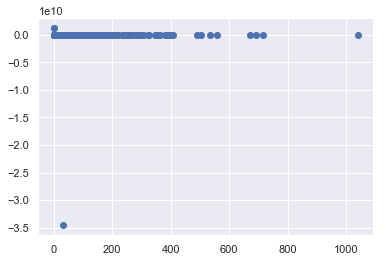

In [85]:
plt.scatter(y_test,predictions)

In [86]:
from sklearn import metrics

In [87]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 23990168.073381882
MSE: 7.7427314319715e+17
RMSE: 879927919.3190485


In [93]:
lm.summary()

AttributeError: 'LinearRegression' object has no attribute 'summary'

In [33]:
sample_df = sample_df.drop(['order_date','transaction_date','week_end_date','deal_supply_channel','auth_bookings',
                            'refunded_units', 'auth_refunds', 'cancel_refunds'],axis=1)

In [34]:
sample_df.head()

,refund_bucket,refund_sub_bucket,dmm_subcat_1,category_1,buyer_name_1,capture_bookings,refunds,capture_units
4164359,Returns,Change of mind,Circles,Geometry,Luis,0.000000,26.97,0
4145318,Returns,Change of mind,Surface of revolution,Calculus II,River,0.000000,355.85,0
4969629,Unknown,Unknown,Mixture Distribution,Probability distribution II,Kevin,54.959041,0.00,1
2410857,Returns,Wrong/Damaged Product,Bivariate Normal Distribution.,Probability distribution I,Arianna,0.000000,18.99,0
5416596,Returns,Change of mind,Circles,Geometry,Declan,0.000000,49.99,0


In [35]:
# Create a function that will transform Refunds column into binary either 1 - when we have a refund 
# or 0 - when refund did not happen
def my_func(column):
    sample_df['refunds_bin'] = np.where(sample_df['refunds']!=0,1,0)
    return sample_df

In [36]:
sample_df=my_func(sample_df['refunds'])

In [37]:
sample_df['refunds_bin'].value_counts()

1    23242
0    10914
Name: refunds_bin, dtype: int64

In [38]:
sample_df.head()

,refund_bucket,refund_sub_bucket,dmm_subcat_1,category_1,buyer_name_1,capture_bookings,refunds,capture_units,refunds_bin
4164359,Returns,Change of mind,Circles,Geometry,Luis,0.000000,26.97,0,1
4145318,Returns,Change of mind,Surface of revolution,Calculus II,River,0.000000,355.85,0,1
4969629,Unknown,Unknown,Mixture Distribution,Probability distribution II,Kevin,54.959041,0.00,1,0
2410857,Returns,Wrong/Damaged Product,Bivariate Normal Distribution.,Probability distribution I,Arianna,0.000000,18.99,0,1
5416596,Returns,Change of mind,Circles,Geometry,Declan,0.000000,49.99,0,1


In [39]:
sample_df = sample_df.drop(['refunds'],axis=1)

In [45]:
two_hour_ref = sample_df[sample_df['refund_bucket']=='Two-Hour Refunds']
fraud = sample_df[sample_df['refund_bucket']=='Fraud']
unknown_sub = sample_df[sample_df['refund_sub_bucket']=="Unknown"]

In [47]:
sample_df = sample_df[sample_df['refund_bucket']!="Two-Hour Refunds"]
sample_df = sample_df[sample_df['refund_bucket']!= 'Fraud']
sample_df = sample_df[sample_df['refund_sub_bucket']!="Unknown"]

In [48]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21070 entries, 4164359 to 3748619
Data columns (total 8 columns):
refund_bucket        21070 non-null object
refund_sub_bucket    21070 non-null object
dmm_subcat_1         21070 non-null object
category_1           21070 non-null object
buyer_name_1         21070 non-null object
capture_bookings     21070 non-null float64
capture_units        21070 non-null int32
refunds_bin          21070 non-null int32
dtypes: float64(1), int32(2), object(5)
memory usage: 1.3+ MB


In [49]:
final_df = pd.get_dummies(sample_df)

### Train Test Split

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X = final_df.drop('refunds_bin',axis=1)
y = final_df['refunds_bin']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Random Forest JP

In [53]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Predictions and Evaluation

In [54]:
from sklearn.metrics import classification_report,confusion_matrix

In [55]:
rfc_pred = rfc.predict(X_test)

In [56]:
print(confusion_matrix(y_test,rfc_pred))

[[  11   49]
 [  21 6240]]


In [61]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.34      0.18      0.24        60
           1       0.99      1.00      0.99      6261

   micro avg       0.99      0.99      0.99      6321
   macro avg       0.67      0.59      0.62      6321
weighted avg       0.99      0.99      0.99      6321



In [62]:
#print(rfc.feature_importances_)

In [63]:
# Saving feature names for later use
feature_list = list(X.columns)
# Convert to numpy array
features = np.array(final_df)

In [67]:
# Get numerical feature importances
importances = list(rfc.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: refund_sub_bucket_Purchase Issues Importance: 0.1537
Variable: buyer_name_1_Unknown Importance: 0.0447
Variable: refund_sub_bucket_Dead Tracking Importance: 0.0169
Variable: buyer_name_1_Asher   Importance: 0.0165
Variable: refund_sub_bucket_Returned to Sender Importance: 0.016
Variable: refund_bucket_Logistics Cancellations Importance: 0.0157
Variable: refund_bucket_Returns Importance: 0.0155
Variable: refund_sub_bucket_Change of mind Importance: 0.0148
Variable: refund_sub_bucket_Tracking Shows Delivered Importance: 0.0148
Variable: buyer_name_1_Audrey  Importance: 0.013
Variable: buyer_name_1_Tessa   Importance: 0.012
Variable: buyer_name_1_Juliette Importance: 0.0117
Variable: refund_sub_bucket_Shipping Issues Importance: 0.0114
Variable: buyer_name_1_Charles  Importance: 0.0114
Variable: refund_sub_bucket_Vendor Shortage Importance: 0.0108
Variable: dmm_subcat_1_Circles Importance: 0.0104
Variable: refund_bucket_Shortage Cancellations Importance: 0.0101
Variable: dmm_sub

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [39]:
# My first idea that didn't work
#for index, row in df2016_2018.iterrows():
#    if df2016_2018['refunds'].items()!=0:
#        df2016_2018['refunds1']=1
#    else:
#        df2016_2018['refunds1']=0

In [118]:
features = sample_df

In [119]:
print('The shape of our features is:', features.shape)

The shape of our features is: (34156, 8)


In [120]:
# One-hot encode the data using pandas get_dummies
features = pd.get_dummies(features)
# Display the first 5 rows of the last 12 columns
features.iloc[:,5:].head(5)

,refund_bucket_Other,refund_bucket_Returns,refund_bucket_Shortage Cancellations,refund_bucket_Two-Hour Refunds,refund_bucket_Unknown,refund_sub_bucket_Change of mind,refund_sub_bucket_Dead Tracking,refund_sub_bucket_Fraud,refund_sub_bucket_Groupon Error,refund_sub_bucket_Other,...,buyer_name_1_Violet,buyer_name_1_Waylon,buyer_name_1_Wesley,buyer_name_1_Weston,buyer_name_1_William,buyer_name_1_Wyatt,buyer_name_1_Ximena,buyer_name_1_Zachary,buyer_name_1_Zoe,buyer_name_1_Zoey
6374286,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5020995,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
109530,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4652392,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
179319,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [121]:
# Labels are the values we want to predict
labels = np.array(features['refunds_bin'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('refunds_bin', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [122]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, 
                                                                            random_state = 42)

In [123]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (25617, 441)
Training Labels Shape: (25617,)
Testing Features Shape: (8539, 441)
Testing Labels Shape: (8539,)


In [124]:
# The baseline predictions are the historical averages
baseline_preds = test_features[:, feature_list.index('average')]
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

ValueError: 'average' is not in list

In [125]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

KeyboardInterrupt: 

In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

In [176]:
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.model_selection import train_test_split

In [177]:
#data_dummies=pd.get_dummies(sample_df)

In [178]:
#data_dummies.head()

,capture_bookings,capture_units,refunds_bin,refund_bucket_Fraud,refund_bucket_Logistics Cancellations,refund_bucket_Other,refund_bucket_Returns,refund_bucket_Shortage Cancellations,refund_bucket_Two-Hour Refunds,refund_bucket_Unknown,...,buyer_name_1_Violet,buyer_name_1_Waylon,buyer_name_1_Wesley,buyer_name_1_Weston,buyer_name_1_William,buyer_name_1_Wyatt,buyer_name_1_Ximena,buyer_name_1_Zachary,buyer_name_1_Zoe,buyer_name_1_Zoey
2083791,0.00,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5557803,59.98,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3565717,141.75,2,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5783853,1321.10,29,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
510522,0.00,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [179]:
X = data_dummies.drop('refunds_bin',axis=1)
y = data_dummies['refunds_bin']
X.head()

,capture_bookings,capture_units,refund_bucket_Fraud,refund_bucket_Logistics Cancellations,refund_bucket_Other,refund_bucket_Returns,refund_bucket_Shortage Cancellations,refund_bucket_Two-Hour Refunds,refund_bucket_Unknown,refund_sub_bucket_Change of mind,...,buyer_name_1_Violet,buyer_name_1_Waylon,buyer_name_1_Wesley,buyer_name_1_Weston,buyer_name_1_William,buyer_name_1_Wyatt,buyer_name_1_Ximena,buyer_name_1_Zachary,buyer_name_1_Zoe,buyer_name_1_Zoey
2083791,0.00,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5557803,59.98,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3565717,141.75,2,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5783853,1321.10,29,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
510522,0.00,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [191]:
y.head()

2083791    1
5557803    0
3565717    0
5783853    0
510522     1
Name: refunds_bin, dtype: int32

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 42)

In [181]:
dtree = DecisionTreeClassifier()

In [182]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [183]:
predictions = dtree.predict(X_test)

In [184]:
from sklearn.metrics import classification_report,confusion_matrix

In [197]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      3293
           1       0.97      0.98      0.97      6954

   micro avg       0.97      0.97      0.97     10247
   macro avg       0.96      0.96      0.96     10247
weighted avg       0.97      0.97      0.97     10247



In [186]:
print(confusion_matrix(y_test,predictions))

[[3100  193]
 [ 157 6797]]


### **Decision Tree Visualization**

### **Feature Importance**

In [ ]:
# Doesn't give me meaningful results
# print(dtree.feature_importances_)
# print(dict(zip(features, dtree.feature_importances_)))

In [189]:
# Use numpy to convert to arrays
# Labels are the values we want to predict
#labels = np.array(features['actual'])
# Remove the labels from the features
# axis 1 refers to the columns
#features= features.drop('actual', axis = 1)
# Saving feature names for later use
feature_list = list(X.columns)
# Convert to numpy array
features = np.array(features)

In [190]:
# Get numerical feature importances
importances = list(dtree.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: refund_sub_bucket_Unknown Importance: 0.8966
Variable: refund_sub_bucket_Fraud Importance: 0.0309
Variable: refund_bucket_Two-Hour Refunds Importance: 0.0082
Variable: refund_sub_bucket_Purchase Issues Importance: 0.0042
Variable: buyer_name_1_Unknown Importance: 0.0022
Variable: buyer_name_1_Asher   Importance: 0.0011
Variable: dmm_subcat_1_Folded Normal / Half Normal Distribution. Importance: 0.0008
Variable: buyer_name_1_Makayla Importance: 0.0008
Variable: buyer_name_1_Max     Importance: 0.0008
Variable: buyer_name_1_Maya    Importance: 0.0008
Variable: dmm_subcat_1_Mengers theorem Importance: 0.0007
Variable: dmm_subcat_1_Pythagorean theorem Importance: 0.0007
Variable: buyer_name_1_Adelyn  Importance: 0.0007
Variable: buyer_name_1_Juliet  Importance: 0.0007
Variable: dmm_subcat_1_A coordinate plane Importance: 0.0006
Variable: dmm_subcat_1_Empirical Distribution Function Importance: 0.0006
Variable: buyer_name_1_Jade    Importance: 0.0006
Variable: buyer_name_1_Lia    

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=600)

In [ ]:
rfc.fit(X_train,y_train)

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,rfc_pred))

In [ ]:
print(classification_report(y_test,rfc_pred)).69